# Set known parameters and estimate the others

In [1]:
import openturns as ot
import numpy as np

In [2]:
ot.RandomGenerator.SetSeed(1976)

In [3]:
sample = ot.Sample(
    [
        [5.3],
        [5.6],
        [5.2],
        [5.3],
        [5.0],
        [5.1],
        [5.9],
        [6.1],
        [5.3],
        [7.2],
    ]
)
sample_size = sample.getSize()
sample_size

10

## Methods of moments

distribution = ot.Exponential()
distribution.getParameterDescription()

In [4]:
distribution = ot.Exponential()
distribution.getParameterDescription()

[lambda,gamma]

In [5]:
factory = ot.MethodOfMomentsFactory(distribution)
factory.setKnownParameter([5.0], [1])
lowerBound = [ot.SpecFunc.MinScalar]  # lambda > 0
upperBound = [ot.SpecFunc.MaxScalar]
finiteLowerBound = [True]
finiteUpperBound = [False]
interval = ot.Interval(lowerBound, upperBound, finiteLowerBound, finiteUpperBound)
factory.setOptimizationBounds(interval)

In [6]:
distribution = factory.build(sample)
distribution

class=Exponential name=Exponential dimension=1 lambda=1.62741 gamma=5

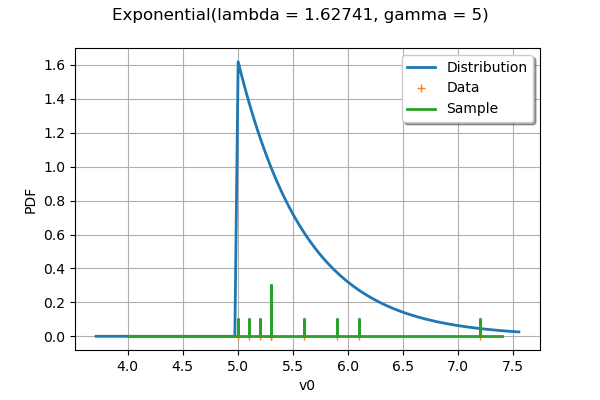

In [7]:
def DrawDistributionAndSample(sample, distribution, method="PDF"):
    if method == "PDF":
        graph = distribution.drawPDF()
    elif method == "CDF":
        graph = distribution.drawCDF()
    elif method == "Survival":
        graph = distribution.drawSurvivalFunction()
    else:
        raise ValueError("Unknown method=", method)
    graph.setTitle("%s" % str(distribution))
    graph.setLegends(["Distribution"])
    # Add data points
    cloud = ot.Cloud(sample, ot.Sample(sample_size, 1))
    cloud.setLegend("Data")
    graph.add(cloud)
    # Add empirical distribution
    sample_distribution = ot.UserDefined(sample)
    if method == "PDF":
        curve = sample_distribution.drawPDF()
    elif method == "CDF":
        curve = sample_distribution.drawCDF()
    elif method == "Survival":
        curve = sample_distribution.drawSurvivalFunction()
    else:
        raise ValueError("Unknown method=", method)
    curve.setLegends(["Sample"])
    graph.add(curve)
    graph.setColors(ot.Drawable.BuildDefaultPalette(3))
    return graph


DrawDistributionAndSample(sample, distribution)

## Method of maximum likelihood

In [8]:
distribution = ot.Exponential()
factory = ot.MaximumLikelihoodFactory(distribution)
factory.setKnownParameter([5.0], [1])  # gamma is known
lowerBound = [ot.SpecFunc.MinScalar]  # lambda > 0
upperBound = [ot.SpecFunc.MaxScalar]
finiteLowerBound = [True]
finiteUpperBound = [False]  # lambda has no upper bound
interval = ot.Interval(lowerBound, upperBound, finiteLowerBound, finiteUpperBound)
factory.setOptimizationBounds(interval)

In [9]:
distribution = factory.build(sample)
distribution

class=Exponential name=Exponential dimension=1 lambda=1.66667 gamma=5

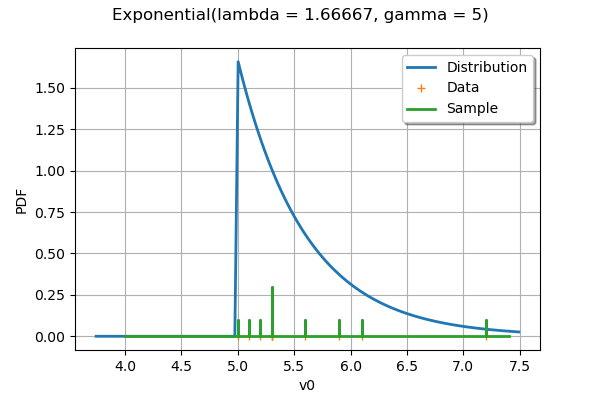

In [10]:
DrawDistributionAndSample(sample, distribution)

## Least squares

In [11]:
distribution = ot.Exponential()
factory = ot.LeastSquaresDistributionFactory(distribution)
factory.setKnownParameter([5.0], [1])
lowerBound = [ot.SpecFunc.MinScalar]
upperBound = [ot.SpecFunc.MaxScalar]
finiteLowerBound = [True]
finiteUpperBound = [False]
interval = ot.Interval(lowerBound, upperBound, finiteLowerBound, finiteUpperBound)
factory.setOptimizationBounds(interval)
interval

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[2.22507e-308] upper bound=class=Point name=Unnamed dimension=1 values=[1.79769e+308] finite lower bound=[1] finite upper bound=[0]

In [12]:
distribution = factory.build(sample)
distribution

class=Exponential name=Exponential dimension=1 lambda=2.46209 gamma=5

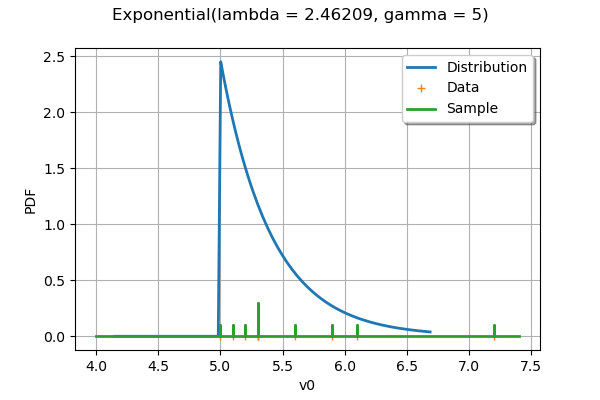

In [13]:
DrawDistributionAndSample(sample, distribution)

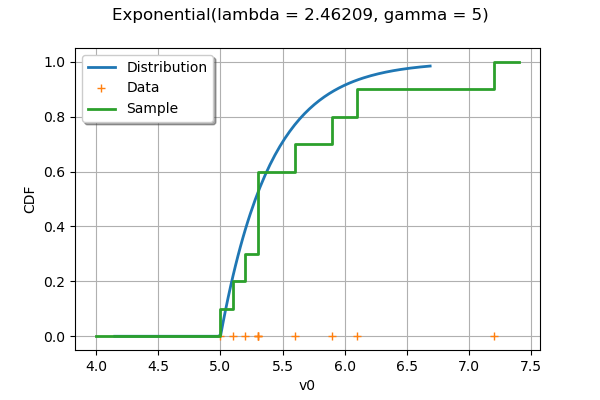

In [14]:
DrawDistributionAndSample(sample, distribution, "CDF")